# Add labrary

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data And EDA

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data=data[data['CustomerID'].notnull()]
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

C:\Users\Pishro\AppData\Local\Temp\ipykernel_9280\1841269460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDay'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))


In [7]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [8]:
pp_date = max(data['InvoiceDay']) + dt.timedelta(1)
pp_date

Timestamp('2011-12-10 00:00:00')

In [9]:
data['Sum Paid'] = data['Quantity'] * data['UnitPrice']
data

C:\Users\Pishro\AppData\Local\Temp\ipykernel_9280\2799152699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sum Paid'] = data['Quantity'] * data['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,Sum Paid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


  # Preparing Data for RFM | Feature Engineering

In [10]:
rfm = data.groupby(by=['CustomerID']).agg({
    'InvoiceDay' : lambda x:  (pp_date - x.max()).days,
    'InvoiceNo'  : 'count',
    'Sum Paid' : 'sum'
})

In [11]:
rfm

,InvoiceDay,InvoiceNo,Sum Paid
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [12]:
rfm.rename({
    'InvoiceDay' : 'Recency',
    'InvoiceNo' : 'Frequency',
    'Sum Paid' : 'Monetary'
}, inplace= True, axis=1)

In [13]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [14]:
r_labels = range(4, 0, -1)
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1,5)
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1,5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)
rfm['R'] = r_groups
rfm['F'] = f_groups
rfm['M'] = m_groups

In [15]:
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,182,4310.00,4,4,4
12348.0,76,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,311,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


# Kmean | DBscan

In [41]:
X = rfm[['R','F','M']]
kmean= KMeans(n_clusters=3)
kmean.fit(X)

KMeans(n_clusters=3)

In [42]:
rfm['KCluster'] = kmean.labels_

In [43]:
rfm

,Recency,Frequency,Monetary,R,F,M,KCluster
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1
12347.0,3,182,4310.00,4,4,4,2
12348.0,76,31,1797.24,2,2,4,2
12349.0,19,73,1757.55,3,3,4,2
12350.0,311,17,334.40,1,1,2,1
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,1
18281.0,181,7,80.82,1,1,1,1
18282.0,8,13,176.60,4,1,1,0


<AxesSubplot:xlabel='KCluster', ylabel='Recency'>

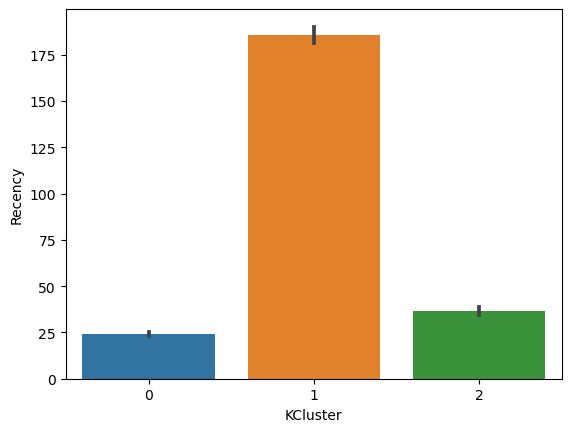

In [44]:
sns.barplot(data=rfm, x='KCluster', y='Recency')

<AxesSubplot:xlabel='KCluster', ylabel='Monetary'>

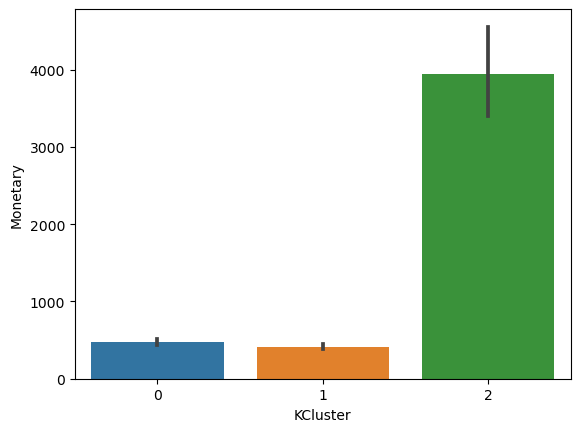

In [45]:
sns.barplot(data=rfm, x='KCluster', y='Monetary')

<AxesSubplot:xlabel='KCluster', ylabel='Frequency'>

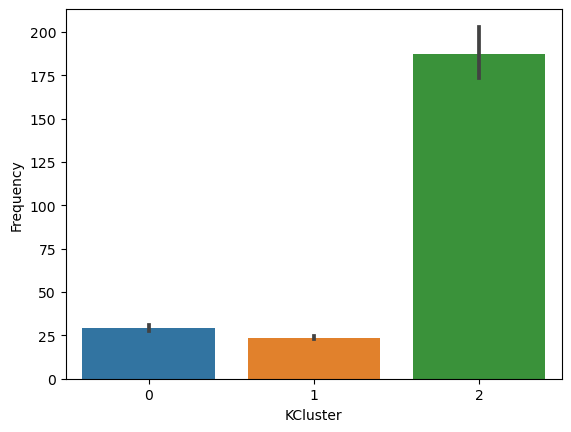

In [46]:
sns.barplot(data=rfm, x='KCluster', y='Frequency')

# Find Best K with Inertia

In [47]:
wcss = {}
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(X)
    wcss[k] = km.inertia_


<AxesSubplot:>

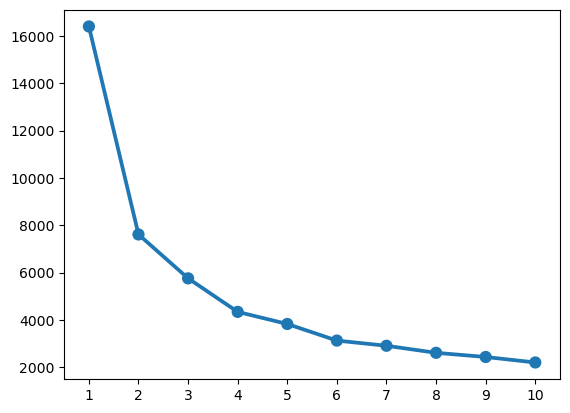

In [48]:
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))

# Evaluation Model

In [49]:
silhouette_score(X , kmean.labels_)

0.4039991412759054

# Simple DBscan model

In [26]:
DBS=DBSCAN(eps=0.7, min_samples=3)
DBS.fit(X)

DBSCAN(eps=0.7, min_samples=3)

In [27]:
np.unique(DBS.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

# Evaluation Model

In [29]:
silhouette_score(X, DBS.labels_)

0.9993138151875571